In [18]:
import ipympl
%matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd
import numpy as np
# import random
import math
import sklearn
import scipy as sp
import networkx
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
#from causalgraphicalmodels import CausalGraphicalModel
#import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

## El equilibrio en el Mercado de Dinero

El equilibrio en el Mercado de Dinero se deriva del equilibrio entre la Oferta de Dinero $(M^s)$ y Demanda de Dinero $(M^d)$:

$$ M^s = M^d $$

$$ \frac{M^s}{P} = kY - ji $$

Se puede suponer que la inflación esperada es cero, ya que a corto plazo el nivel de precios es fijo y exógeno. Por lo tanto, no habría una gran diferencia entre la tasa de interés nominal $(i)$ y la real $(r)$.

Entonces la ecuación del equilibrio en el mercado monetario es:

$$ \frac{M^s}{P} = kY - jr $$


Y puede graficarse de la siguiente manera:

In [19]:
# Parameters
r_size = 100

k = 0.5
j = 0.2
P  = 10
Y = 35
MS_0 = 50
r = np.arange(r_size)

# Necesitamos crear la funcion de demanda

def MD(k, j, P, r, Y):
    MD_eq = (k*Y - j*r)
    return MD_eq
MD_0 = MD(k, j, P, r, Y)
# Necesitamos crear la oferta de dinero.
MS = MS_0 / P
MS

5.0

In [9]:
print(MD_0.max())
print(r.max())


17.5
99


In [10]:
MD_0

array([17.5, 17.3, 17.1, 16.9, 16.7, 16.5, 16.3, 16.1, 15.9, 15.7, 15.5,
       15.3, 15.1, 14.9, 14.7, 14.5, 14.3, 14.1, 13.9, 13.7, 13.5, 13.3,
       13.1, 12.9, 12.7, 12.5, 12.3, 12.1, 11.9, 11.7, 11.5, 11.3, 11.1,
       10.9, 10.7, 10.5, 10.3, 10.1,  9.9,  9.7,  9.5,  9.3,  9.1,  8.9,
        8.7,  8.5,  8.3,  8.1,  7.9,  7.7,  7.5,  7.3,  7.1,  6.9,  6.7,
        6.5,  6.3,  6.1,  5.9,  5.7,  5.5,  5.3,  5.1,  4.9,  4.7,  4.5,
        4.3,  4.1,  3.9,  3.7,  3.5,  3.3,  3.1,  2.9,  2.7,  2.5,  2.3,
        2.1,  1.9,  1.7,  1.5,  1.3,  1.1,  0.9,  0.7,  0.5,  0.3,  0.1,
       -0.1, -0.3, -0.5, -0.7, -0.9, -1.1, -1.3, -1.5, -1.7, -1.9, -2.1,
       -2.3])

In [11]:
MS_0_vector = np.full(100,5)
MS_0_vector

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

**Función principal para hallar los puntos de equilibrio**

In [12]:
# líneas punteadas autómaticas

    # definir la función line_intersection
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

In [13]:
# EN EQUILIBRIO 
    # coordenadas de las curvas (x,y)
A = [MD_0[0], r[0]] # DA, coordenada inicio
B = [MD_0[-1], r[-1]] # DA, coordenada fin

C = [MS_0_vector[0], r[0]] # L_45, coordenada inicio
D = [MS_0_vector[-1], r[-1]] # L_45, coordenada fin
# 
    # creación de intersección

intersec = line_intersection((A, B), (C, D))
intersec # (y,x)

(5.0, 62.5)

In [38]:
[min(MD_0), intersec[0]]

[-2.3000000000000007, 5.0]

In [40]:
[intersec[1], intersec[1]]

[62.5, 62.5]

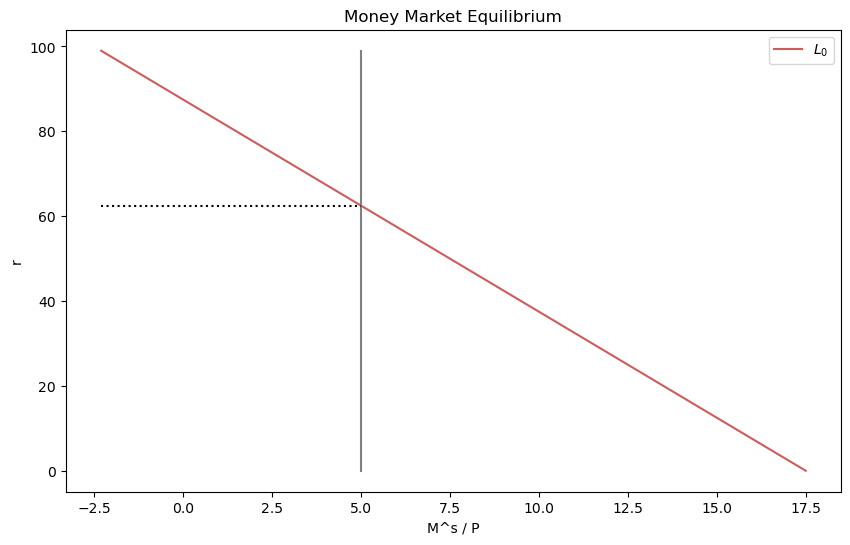

In [45]:
# Equilibrio en el mercado de dinero

# Creamos el seteo para la figura
fig, ax1 = plt.subplots(figsize=(10, 6))

# Agregamos titulo t el nombre de las coordenadas
ax1.set(title="Money Market Equilibrium", xlabel=r'M^s / P', ylabel=r'r')

# Ploteamos la demanda de dinero
ax1.plot(MD_0, r, label= '$L_0$', color = '#CD5C5C')

# Para plotear la oferta de dinero solo necesitamos crear una linea vertical
ax1.plot(MS_0_vector, r , color = "grey")

# Creamos las lineas puntadas para el equilibrio
#ax1.axhline(intersec[1], xmin= 0, xmax= intersec[0]/r.max(), linestyle = ":", color = "black")
#plt.axhline(intersec[1], xmin= 0, xmax=intersec[0]/r.max(), linestyle = ":", color = "black")
#plt.axhline(intersec[1], xmin= 0, xmax=(intersec[0]-r.min())/(r.max()-r.min()), linestyle = ":", color = "black")
# Agregamos texto
#ax1.text(0, 7.5, "$r_0$", fontsize = 12, color = 'black')
ax1.plot([min(MD_0), intersec[0]], [intersec[1], intersec[1]], linestyle=':', color='black')

#ax1.yaxis.set_major_locator(plt.NullLocator())
#ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.legend()

plt.show()

### ¿Qué sucede en el Mercado de Dinero si el producto se incrementa? 

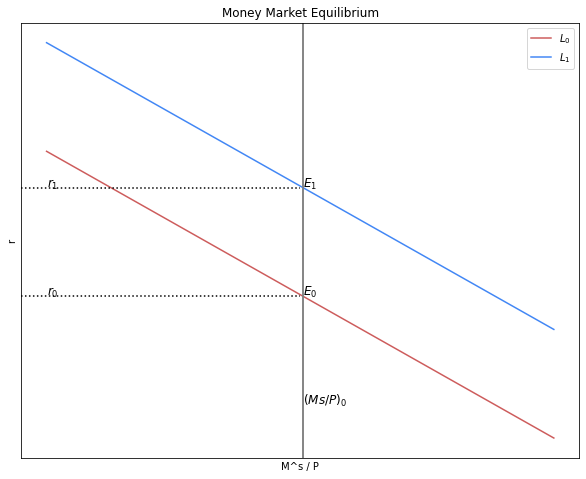

In [5]:
# Parameters con cambio en el nivel del producto
r_size = 100

k = 0.5
j = 0.2                
P  = 10 
Y_1 = 50
MS_0 = 50

r = np.arange(r_size)

# Necesitamos crear la funcion de demanda 

def MD(k, j, P, r, Y):
    MD_eq = (k*Y - j*r)
    return MD_eq
MD_1 = MD(k, j, P, r, Y_1)
# Necesitamos crear la oferta de dinero.
MS_1 = MD_1 / P
MS_1

# Equilibrio en el mercado de dinero

# Creamos el seteo para la figura 
fig, ax1 = plt.subplots(figsize=(10, 8))

# Agregamos titulo t el nombre de las coordenadas
ax1.set(title="Money Market Equilibrium", xlabel=r'M^s / P', ylabel=r'r')

# Ploteamos la demanda de dinero
ax1.plot(MD_0, label= '$L_0$', color = '#CD5C5C')
#ax1.plot(MD_1, label= '$L_0$', color = '#CD5C5C')


# Para plotear la oferta de dinero solo necesitamos crear una linea vertical
ax1.axvline(x = MS,  ymin= 0, ymax= 1, color = "grey")

# Creamos las lineas puntadas para el equilibrio
ax1.axhline(y=7.5, xmin= 0, xmax= 0.5, linestyle = ":", color = "black")

# Agregamos texto
ax1.text(0, 7.5, "$r_0$", fontsize = 12, color = 'black')
ax1.text(50, 0, "$(Ms/P)_0$", fontsize = 12, color = 'black')
ax1.text(50, 7.5, "$E_0$", fontsize = 12, color = 'black')

# Nuevas curvas a partir del cambio en el nivel del producto
ax1.plot(MD_1, label= '$L_1$', color = '#4287f5')
ax1.axvline(x = MS,  ymin= 0, ymax= 1, color = "grey")
ax1.axhline(y=15, xmin= 0, xmax= 0.5, linestyle = ":", color = "black")
ax1.text(0, 15, "$r_1$", fontsize = 12, color = 'black')
ax1.text(50, 15, "$E_1$", fontsize = 12, color = 'black')


ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.legend()

plt.show()

optimización

In [25]:
# Parameters con cambio en el nivel del producto
r_size = 100

k = 0.5
j = 0.2                
P  = 10 
Y_1 = 40
MS_0 = 50

r = np.arange(r_size)

# Necesitamos crear la funcion de demanda 

def MD(k, j, P, r, Y):
    MD_eq = (k*Y - j*r)
    return MD_eq
MD_1 = MD(k, j, P, r, Y_1)
# Necesitamos crear la oferta de dinero.
MS_1 = MD_1 / P
MS_1

array([2.  , 1.98, 1.96, 1.94, 1.92, 1.9 , 1.88, 1.86, 1.84, 1.82, 1.8 ,
       1.78, 1.76, 1.74, 1.72, 1.7 , 1.68, 1.66, 1.64, 1.62, 1.6 , 1.58,
       1.56, 1.54, 1.52, 1.5 , 1.48, 1.46, 1.44, 1.42, 1.4 , 1.38, 1.36,
       1.34, 1.32, 1.3 , 1.28, 1.26, 1.24, 1.22, 1.2 , 1.18, 1.16, 1.14,
       1.12, 1.1 , 1.08, 1.06, 1.04, 1.02, 1.  , 0.98, 0.96, 0.94, 0.92,
       0.9 , 0.88, 0.86, 0.84, 0.82, 0.8 , 0.78, 0.76, 0.74, 0.72, 0.7 ,
       0.68, 0.66, 0.64, 0.62, 0.6 , 0.58, 0.56, 0.54, 0.52, 0.5 , 0.48,
       0.46, 0.44, 0.42, 0.4 , 0.38, 0.36, 0.34, 0.32, 0.3 , 0.28, 0.26,
       0.24, 0.22, 0.2 , 0.18, 0.16, 0.14, 0.12, 0.1 , 0.08, 0.06, 0.04,
       0.02])

In [26]:
MD_1

array([20. , 19.8, 19.6, 19.4, 19.2, 19. , 18.8, 18.6, 18.4, 18.2, 18. ,
       17.8, 17.6, 17.4, 17.2, 17. , 16.8, 16.6, 16.4, 16.2, 16. , 15.8,
       15.6, 15.4, 15.2, 15. , 14.8, 14.6, 14.4, 14.2, 14. , 13.8, 13.6,
       13.4, 13.2, 13. , 12.8, 12.6, 12.4, 12.2, 12. , 11.8, 11.6, 11.4,
       11.2, 11. , 10.8, 10.6, 10.4, 10.2, 10. ,  9.8,  9.6,  9.4,  9.2,
        9. ,  8.8,  8.6,  8.4,  8.2,  8. ,  7.8,  7.6,  7.4,  7.2,  7. ,
        6.8,  6.6,  6.4,  6.2,  6. ,  5.8,  5.6,  5.4,  5.2,  5. ,  4.8,
        4.6,  4.4,  4.2,  4. ,  3.8,  3.6,  3.4,  3.2,  3. ,  2.8,  2.6,
        2.4,  2.2,  2. ,  1.8,  1.6,  1.4,  1.2,  1. ,  0.8,  0.6,  0.4,
        0.2])

In [27]:
MS_1_vector = np.full(100,5)
MS_1_vector

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [28]:
# EN EQUILIBRIO 
    # coordenadas de las curvas (x,y)
A = [MD_1[0], r[0]] # DA, coordenada inicio
B = [MD_1[-1], r[-1]] # DA, coordenada fin

C = [MS_1_vector[0], r[0]] # L_45, coordenada inicio
D = [MS_1_vector[-1], r[-1]] # L_45, coordenada fin
# 

In [29]:
    # creación de intersección

intersec1 = line_intersection((A, B), (C, D))
intersec1 # (y,x)

(5.0, 75.0)

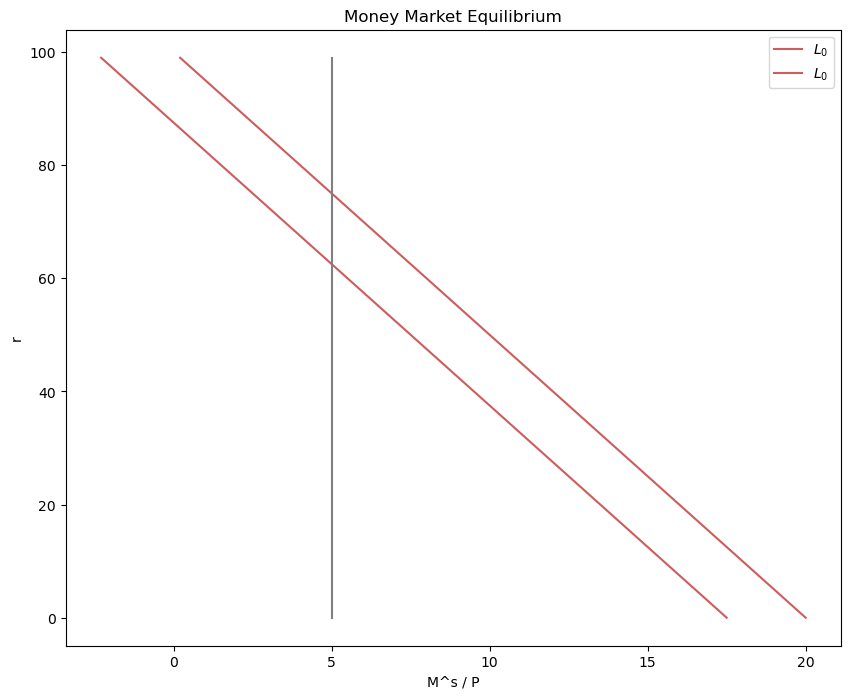

In [31]:
# Equilibrio en el mercado de dinero

# Creamos el seteo para la figura
fig, ax1 = plt.subplots(figsize=(10, 8))

# Agregamos titulo t el nombre de las coordenadas
ax1.set(title="Money Market Equilibrium", xlabel=r'M^s / P', ylabel=r'r')

# Ploteamos la demanda de dinero
ax1.plot(MD_0, r, label= '$L_0$', color = '#CD5C5C')

# Ploteamos la demanda de dinero 1
ax1.plot(MD_1, r, label= '$L_0$', color = '#CD5C5C')

# Para plotear la oferta de dinero solo necesitamos crear una linea vertical
ax1.plot(MS_0_vector, r , color = "grey")

# Creamos las lineas puntadas para el equilibrio
# ax1.axhline(y=7.5, xmin= 0, xmax= 0.5, linestyle = ":", color = "black")

# Agregamos texto
#ax1.text(0, 7.5, "$r_0$", fontsize = 12, color = 'black')

#ax1.yaxis.set_major_locator(plt.NullLocator())
#ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.legend()

plt.show()

### ¿Qué sucede en el Mercado de Dinero si la cantidad de dinero se incrementa? 

In [6]:
# Parameters con cambio en el nivel del producto
r_size = 100

k = 0.5
j = 0.2                
P_1  = 20 
Y = 35
MS_0 = 500

r = np.arange(r_size)

# Necesitamos crear la funcion de demanda 

def MD(k, j, P, r, Y):
    MD_eq = (k*Y - j*r)
    return MD_eq
MD_1 = MD(k, j, P_1, r, Y)
# Necesitamos crear la oferta de dinero.
MS_1 = MS_0 / P_1
MS

50.0

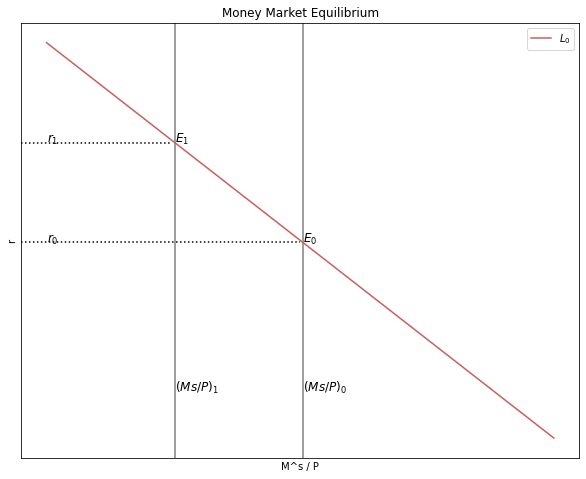

In [7]:
# Equilibrio en el mercado de dinero

# Creamos el seteo para la figura 
fig, ax1 = plt.subplots(figsize=(10, 8))

# Agregamos titulo t el nombre de las coordenadas
ax1.set(title="Money Market Equilibrium", xlabel=r'M^s / P', ylabel=r'r')

# Ploteamos la demanda de dinero
ax1.plot(MD_0, label= '$L_0$', color = '#CD5C5C')
#ax1.plot(MD_1, label= '$L_0$', color = '#CD5C5C')


# Para plotear la oferta de dinero solo necesitamos crear una linea vertical
ax1.axvline(x = MS,  ymin= 0, ymax= 1, color = "grey")

# Creamos las lineas puntadas para el equilibrio
ax1.axhline(y=7.5, xmin= 0, xmax= 0.5, linestyle = ":", color = "black")

# Agregamos texto
ax1.text(0, 7.5, "$r_0$", fontsize = 12, color = 'black')
ax1.text(50, 0, "$(Ms/P)_0$", fontsize = 12, color = 'black')
ax1.text(50, 7.5, "$E_0$", fontsize = 12, color = 'black')


# Nuevas curvas a partir del cambio en el nivel del producto
#ax1.plot(MD_1, label= '$L_1$', color = '#4287f5')
ax1.axvline(x = MS_1,  ymin= 0, ymax= 1, color = "grey")
ax1.axhline(y=12.5, xmin= 0, xmax= 0.27, linestyle = ":", color = "black")
ax1.text(0, 12.5, "$r_1$", fontsize = 12, color = 'black')
ax1.text(25, 0, "$(Ms/P)_1$", fontsize = 12, color = 'black')
ax1.text(25, 12.5, "$E_1$", fontsize = 12, color = 'black')

ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.legend()

plt.show()

optimización

In [35]:
# Parameters con cambio en el nivel del producto
r_size = 100

k = 0.5
j = 0.2                
P_1  = 20 
Y = 35
MS_0 = 70

r = np.arange(r_size)

# Necesitamos crear la funcion de demanda 

def MD(k, j, P, r, Y):
    MD_eq = (k*Y - j*r)
    return MD_eq
MD_2 = MD(k, j, P_1, r, Y)
# Necesitamos crear la oferta de dinero.
MS_2 = MS_0 / P_1
MS_2

3.5

In [36]:
MD_2

array([17.5, 17.3, 17.1, 16.9, 16.7, 16.5, 16.3, 16.1, 15.9, 15.7, 15.5,
       15.3, 15.1, 14.9, 14.7, 14.5, 14.3, 14.1, 13.9, 13.7, 13.5, 13.3,
       13.1, 12.9, 12.7, 12.5, 12.3, 12.1, 11.9, 11.7, 11.5, 11.3, 11.1,
       10.9, 10.7, 10.5, 10.3, 10.1,  9.9,  9.7,  9.5,  9.3,  9.1,  8.9,
        8.7,  8.5,  8.3,  8.1,  7.9,  7.7,  7.5,  7.3,  7.1,  6.9,  6.7,
        6.5,  6.3,  6.1,  5.9,  5.7,  5.5,  5.3,  5.1,  4.9,  4.7,  4.5,
        4.3,  4.1,  3.9,  3.7,  3.5,  3.3,  3.1,  2.9,  2.7,  2.5,  2.3,
        2.1,  1.9,  1.7,  1.5,  1.3,  1.1,  0.9,  0.7,  0.5,  0.3,  0.1,
       -0.1, -0.3, -0.5, -0.7, -0.9, -1.1, -1.3, -1.5, -1.7, -1.9, -2.1,
       -2.3])

In [37]:
MS_2_vector = np.full(100,7.5)
MS_2_vector

array([7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5,
       7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5,
       7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5,
       7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5,
       7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5,
       7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5,
       7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5,
       7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5])

In [38]:
# EN EQUILIBRIO 
    # coordenadas de las curvas (x,y)
A = [MD_2[0], r[0]] # DA, coordenada inicio
B = [MD_2[-1], r[-1]] # DA, coordenada fin

C = [MS_2_vector[0], r[0]] # L_45, coordenada inicio
D = [MS_2_vector[-1], r[-1]] # L_45, coordenada fin

In [39]:

intersec2 = line_intersection((A, B), (C, D))
intersec2 # (y,x)

(7.5, 50.0)

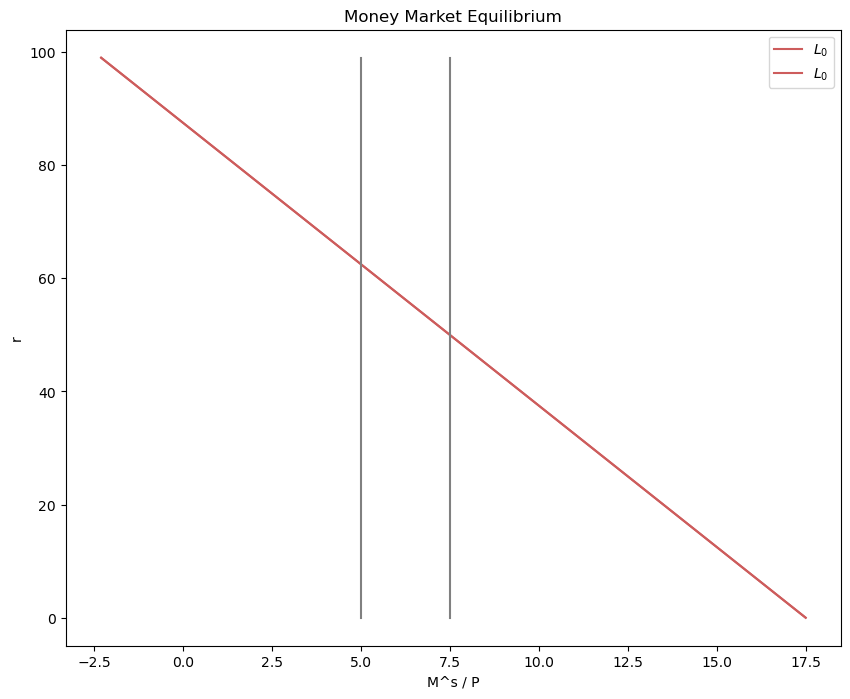

In [41]:
# Equilibrio en el mercado de dinero

# Creamos el seteo para la figura
fig, ax1 = plt.subplots(figsize=(10, 8))

# Agregamos titulo t el nombre de las coordenadas
ax1.set(title="Money Market Equilibrium", xlabel=r'M^s / P', ylabel=r'r')

# Ploteamos la demanda de dinero
ax1.plot(MD_0, r, label= '$L_0$', color = '#CD5C5C')

# Ploteamos la demanda de dinero 1
ax1.plot(MD_2, r, label= '$L_0$', color = '#CD5C5C')

# Para plotear la oferta de dinero solo necesitamos crear una linea vertical
ax1.plot(MS_0_vector, r , color = "grey")

# Para plotear la oferta de dinero solo necesitamos crear una linea vertical
ax1.plot(MS_2_vector, r , color = "grey")


# Creamos las lineas puntadas para el equilibrio
# ax1.axhline(y=7.5, xmin= 0, xmax= 0.5, linestyle = ":", color = "black")

# Agregamos texto
#ax1.text(0, 7.5, "$r_0$", fontsize = 12, color = 'black')

#ax1.yaxis.set_major_locator(plt.NullLocator())
#ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.legend()

plt.show()

## Derivación de la Curva LM a partir del Equilibrio en el Mercado de Dinero

In [8]:
#1----------------------Equilibrio mercado monetario

    # Parameters
r_size = 100

k = 0.5
j = 0.2                
P  = 10 
Y = 35

r = np.arange(r_size)


    # Ecuación
def Ms_MD(k, j, P, r, Y):
    Ms_MD = P*(k*Y - j*r)
    return Ms_MD

Ms_MD = Ms_MD(k, j, P, r, Y)


    # Nuevos valores de Y
Y1 = 45

def Ms_MD_Y1(k, j, P, r, Y1):
    Ms_MD = P*(k*Y1 - j*r)
    return Ms_MD

Ms_Y1 = Ms_MD_Y1(k, j, P, r, Y1)


Y2 = 25

def Ms_MD_Y2(k, j, P, r, Y2):
    Ms_MD = P*(k*Y2 - j*r)
    return Ms_MD

Ms_Y2 = Ms_MD_Y2(k, j, P, r, Y2)

#2----------------------Curva LM

    # Parameters
Y_size = 100

k = 0.5
j = 0.2                
P  = 10               
Ms = 30            

Y = np.arange(Y_size)


# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

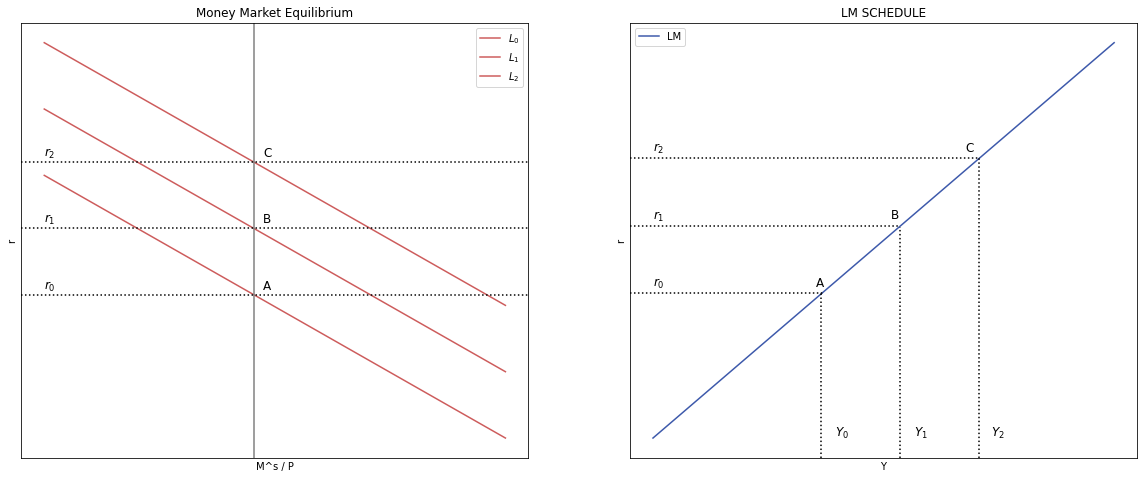

In [9]:
# Gráfico de la derivación de la curva LM a partir del equilibrio en el mercado monetario

    # Dos gráficos en un solo cuadro
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 8)) 


#---------------------------------
    # Gráfico 1: Equilibrio en el mercado de dinero
    
ax1.set(title="Money Market Equilibrium", xlabel=r'M^s / P', ylabel=r'r')
ax1.plot(Y, Ms_MD, label= '$L_0$', color = '#CD5C5C')
ax1.plot(Y, Ms_Y1, label= '$L_1$', color = '#CD5C5C')
ax1.plot(Y, Ms_Y2, label= '$L_2$', color = '#CD5C5C')
ax1.axvline(x = 45,  ymin= 0, ymax= 1, color = "grey")

ax1.axhline(y=35, xmin= 0, xmax= 1, linestyle = ":", color = "black")
ax1.axhline(y=135, xmin= 0, xmax= 1, linestyle = ":", color = "black")
ax1.axhline(y=85, xmin= 0, xmax= 1, linestyle = ":", color = "black")

ax1.text(47, 139, "C", fontsize = 12, color = 'black')
ax1.text(47, 89, "B", fontsize = 12, color = 'black')
ax1.text(47, 39, "A", fontsize = 12, color = 'black')

ax1.text(0, 139, "$r_2$", fontsize = 12, color = 'black')
ax1.text(0, 89, "$r_1$", fontsize = 12, color = 'black')
ax1.text(0, 39, "$r_0$", fontsize = 12, color = 'black')

ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.legend()
 

#---------------------------------
    # Gráfico 2: Curva LM
    
ax2.set(title="LM SCHEDULE", xlabel=r'Y', ylabel=r'r')
ax2.plot(Y, i, label="LM", color = '#3D59AB')

ax2.axhline(y=160, xmin= 0, xmax= 0.69, linestyle = ":", color = "black")
ax2.axhline(y=118, xmin= 0, xmax= 0.53, linestyle = ":", color = "black")
ax2.axhline(y=76, xmin= 0, xmax= 0.38, linestyle = ":", color = "black")

ax2.text(67, 164, "C", fontsize = 12, color = 'black')
ax2.text(51, 122, "B", fontsize = 12, color = 'black')
ax2.text(35, 80, "A", fontsize = 12, color = 'black')

ax2.text(0, 164, "$r_2$", fontsize = 12, color = 'black')
ax2.text(0, 122, "$r_1$", fontsize = 12, color = 'black')
ax2.text(0, 80, "$r_0$", fontsize = 12, color = 'black')

ax2.text(72.5, -14, "$Y_2$", fontsize = 12, color = 'black')
ax2.text(56, -14, "$Y_1$", fontsize = 12, color = 'black')
ax2.text(39, -14, "$Y_0$", fontsize = 12, color = 'black')

ax2.axvline(x=70,  ymin= 0, ymax= 0.69, linestyle = ":", color = "black")
ax2.axvline(x=53,  ymin= 0, ymax= 0.53, linestyle = ":", color = "black")
ax2.axvline(x=36,  ymin= 0, ymax= 0.38, linestyle = ":", color = "black")

ax2.yaxis.set_major_locator(plt.NullLocator())   
ax2.xaxis.set_major_locator(plt.NullLocator())

ax2.legend()

plt.show()

## Curva LM

Siguiendo la última ecuación de equilibrio, la curva LM se da en función de la tasa de interés:

$$ r = -\frac{1}{j}\frac{M_o^s}{P_o} + \frac{k}{j}Y $$

In [10]:
# Parameters
Y_size = 100

k = 10
j = 10                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)


# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

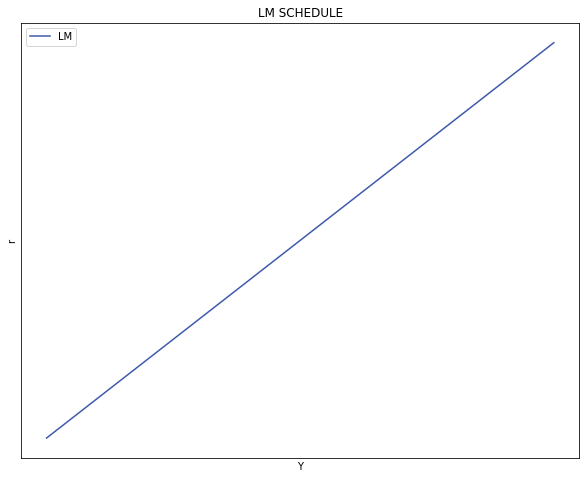

In [11]:
    # Gráfico de la curva LM

# Dimensiones del gráfico
y_max = np.max(i)
v = [0, Y_size, 0, y_max]   
fig, ax = plt.subplots(figsize=(10, 8))

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Curvas a graficar
ax.plot(Y, i, label="LM", color = '#3D59AB')

# Título y leyenda
ax.set(title="LM SCHEDULE", xlabel=r'Y', ylabel=r'r')
ax.legend()


plt.show()

## Estática comparativa

### Política monetaria expansiva: incremento en la Masa Monetaria $(M^s)$

In [12]:
#--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva LM

# Definir SOLO el parámetro cambiado
Ms = 700

# Generar la ecuación con el nuevo parámetro
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

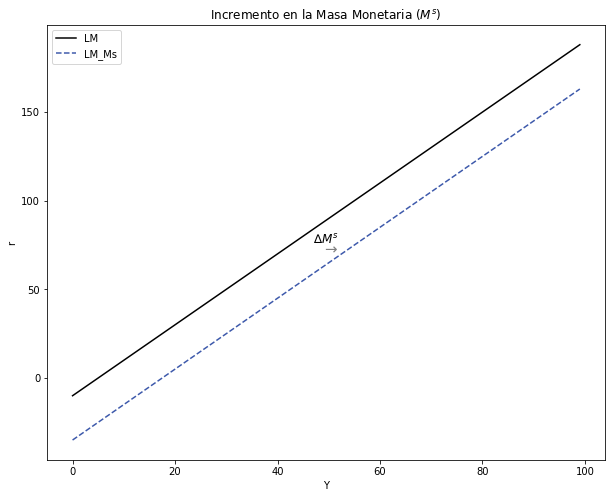

In [13]:
# Dimensiones del gráfico
y_max = np.max(i)
v = [0, Y_size, 0, y_max]   
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, i, label="LM", color = 'black')
ax.plot(Y, i_Ms, label="LM_Ms", color = '#3D59AB', linestyle = 'dashed')

# Texto agregado
plt.text(47, 76, '∆$M^s$', fontsize=12, color='black')
plt.text(49, 70, '→', fontsize=15, color='grey')

# Título y leyenda
ax.set(title = "Incremento en la Masa Monetaria $(M^s)$", xlabel=r'Y', ylabel=r'r')
ax.legend()


plt.show()


## Ejercicios

### Efectos dentro del Mercado de Dinero

#### Explique y grafique qué sucede en el mercado de dinero si $ΔY < 0$

Ante la disminución del nivel de ingresos $(ΔY < 0)$, la demanda de dinero caerá $(M^d)$. Esto se reflejará en una contracción de la curva de demanda. Dado que la demanda será menor a la oferta, para volver al equilibrio, la tasa de interés $(t)$ disminuirá.

In [14]:
# Parameters

r_size = 100

k = 0.5
j = 0.2                
P  = 10 
Y = 35

r = np.arange(r_size)

    # Ecuación

def Ms_MD(k, j, P, r, Y):
    Ms_MD = P*(k*Y - j*r)
    return Ms_MD

Ms_MD = Ms_MD(k, j, P, r, Y)

#----
Y = 20

def Ms_MD_Y(k, j, P, r, Y):
    Ms_MD = P*(k*Y - j*r)
    return Ms_MD

Ms_MD_Y = Ms_MD_Y(k, j, P, r, Y)

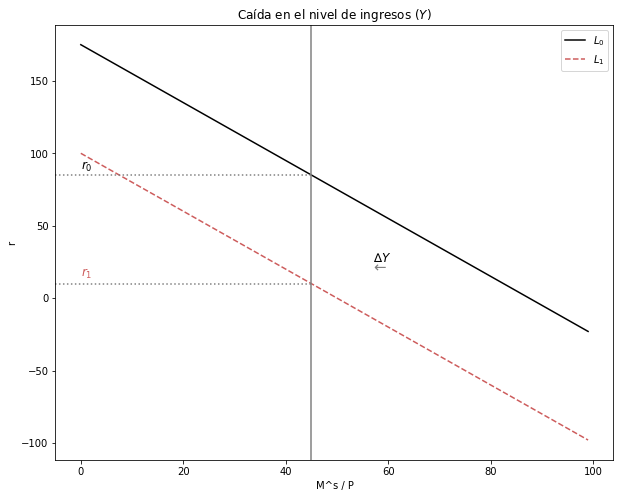

In [15]:
    # Gráfico

fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set(title="Caída en el nivel de ingresos $(Y)$", xlabel=r'M^s / P', ylabel=r'r')
ax1.plot(Ms_MD, label= '$L_0$', color = 'black')
ax1.plot(Ms_MD_Y, label= '$L_1$', color = '#CD5C5C', linestyle = 'dashed')

ax1.axvline(x = 45,  ymin= 0, ymax= 1, color = "grey")
ax1.axhline(y=85, xmin= 0, xmax= 0.46, linestyle = ":", color = "grey")
ax1.axhline(y=10, xmin= 0, xmax= 0.46, linestyle = ":", color = "grey")
ax1.text(0, 89, "$r_0$", fontsize = 12, color = 'black')
ax1.text(0, 15, "$r_1$", fontsize = 12, color = '#CD5C5C')

ax1.text(57, 25, '∆$Y$', fontsize=12, color='black')
plt.text(57, 18, '←', fontsize=15, color='grey')

ax1.legend()

plt.show()

optimización

In [58]:
# Parameters

r_size = 100

k = 0.5
j = 0.2                
P  = 10 
Y = 35
MS_0 = 50

r = np.arange(r_size)

    # Ecuación

def MD(k, j, P, r, Y):
    MD_eq = (k*Y - j*r)
    return MD_eq

MD_1 = MD(k, j, P, r, Y)

# Necesitamos crear la oferta de dinero.
MS = MS_0 / P
MS

#----
Y_1 = 20

def Ms_MD_Y(k, j, P, r, Y_1):
    Ms_MD_Y = (k*Y - j*r)
    return Ms_MD

Ms_MD_Y = Ms_MD_Y(k, j, P, r, Y_1)

In [61]:
MD_1

array([17.5, 17.3, 17.1, 16.9, 16.7, 16.5, 16.3, 16.1, 15.9, 15.7, 15.5,
       15.3, 15.1, 14.9, 14.7, 14.5, 14.3, 14.1, 13.9, 13.7, 13.5, 13.3,
       13.1, 12.9, 12.7, 12.5, 12.3, 12.1, 11.9, 11.7, 11.5, 11.3, 11.1,
       10.9, 10.7, 10.5, 10.3, 10.1,  9.9,  9.7,  9.5,  9.3,  9.1,  8.9,
        8.7,  8.5,  8.3,  8.1,  7.9,  7.7,  7.5,  7.3,  7.1,  6.9,  6.7,
        6.5,  6.3,  6.1,  5.9,  5.7,  5.5,  5.3,  5.1,  4.9,  4.7,  4.5,
        4.3,  4.1,  3.9,  3.7,  3.5,  3.3,  3.1,  2.9,  2.7,  2.5,  2.3,
        2.1,  1.9,  1.7,  1.5,  1.3,  1.1,  0.9,  0.7,  0.5,  0.3,  0.1,
       -0.1, -0.3, -0.5, -0.7, -0.9, -1.1, -1.3, -1.5, -1.7, -1.9, -2.1,
       -2.3])

In [62]:
Ms_MD_Y

array([175., 173., 171., 169., 167., 165., 163., 161., 159., 157., 155.,
       153., 151., 149., 147., 145., 143., 141., 139., 137., 135., 133.,
       131., 129., 127., 125., 123., 121., 119., 117., 115., 113., 111.,
       109., 107., 105., 103., 101.,  99.,  97.,  95.,  93.,  91.,  89.,
        87.,  85.,  83.,  81.,  79.,  77.,  75.,  73.,  71.,  69.,  67.,
        65.,  63.,  61.,  59.,  57.,  55.,  53.,  51.,  49.,  47.,  45.,
        43.,  41.,  39.,  37.,  35.,  33.,  31.,  29.,  27.,  25.,  23.,
        21.,  19.,  17.,  15.,  13.,  11.,   9.,   7.,   5.,   3.,   1.,
        -1.,  -3.,  -5.,  -7.,  -9., -11., -13., -15., -17., -19., -21.,
       -23.])

In [63]:
MS_2_vector = np.full(100,5)
MS_2_vector

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [64]:
# EN EQUILIBRIO 
    # coordenadas de las curvas (x,y)
A = [MD_1[0], r[0]] # DA, coordenada inicio
B = [MD_1[-1], r[-1]] # DA, coordenada fin

C = [MS_2_vector[0], r[0]] # L_45, coordenada inicio
D = [MS_2_vector[-1], r[-1]] # L_45, coordenada fin

In [65]:

intersec2 = line_intersection((A, B), (C, D))
intersec2 # (y,x)

(5.0, 62.5)

In [67]:
# CON SHOCK
    # coordenadas de las curvas (x,y)
A = [Ms_MD_Y[0], r[0]] # DA, coordenada inicio
B = [Ms_MD_Y[-1], r[-1]] # DA, coordenada fin

C = [MS_2_vector[0], r[0]] # L_45, coordenada inicio
D = [MS_2_vector[-1], r[-1]] # L_45, coordenada fin

intersec3= line_intersection((A, B), (C, D))
intersec3 # (y,x)

(5.0, 85.0)

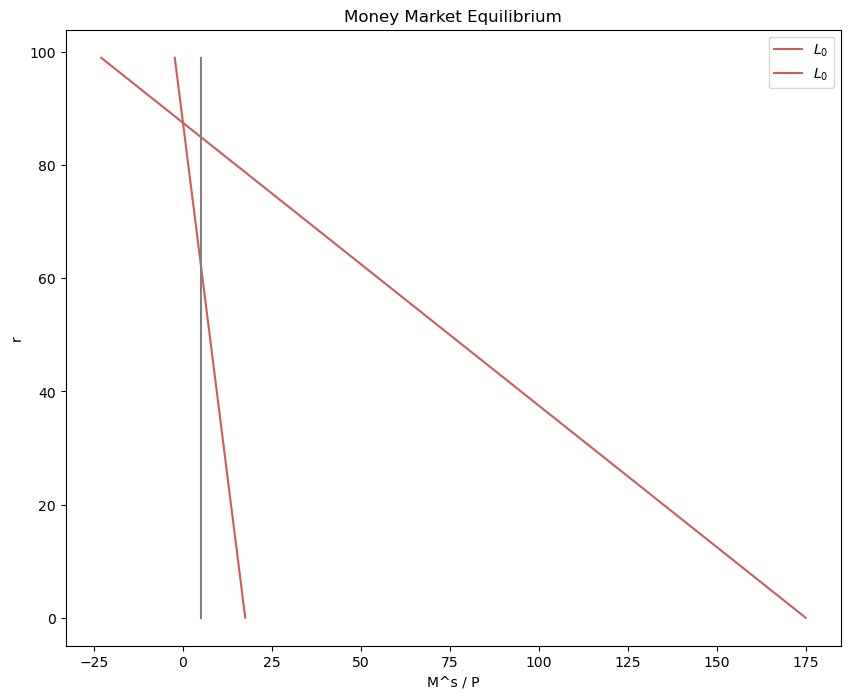

In [68]:
# Equilibrio en el mercado de dinero

# Creamos el seteo para la figura
fig, ax1 = plt.subplots(figsize=(10, 8))

# Agregamos titulo t el nombre de las coordenadas
ax1.set(title="Money Market Equilibrium", xlabel=r'M^s / P', ylabel=r'r')

# Ploteamos la demanda de dinero
ax1.plot(MD_1, r, label= '$L_0$', color = '#CD5C5C')

# Ploteamos la demanda de dinero 1
ax1.plot(Ms_MD_Y, r, label= '$L_0$', color = '#CD5C5C')

# Para plotear la oferta de dinero solo necesitamos crear una linea vertical
ax1.plot(MS_2_vector, r , color = "grey")



# Creamos las lineas puntadas para el equilibrio
# ax1.axhline(y=7.5, xmin= 0, xmax= 0.5, linestyle = ":", color = "black")

# Agregamos texto
#ax1.text(0, 7.5, "$r_0$", fontsize = 12, color = 'black')

#ax1.yaxis.set_major_locator(plt.NullLocator())
#ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.legend()

plt.show()

#### Explique y grafique qué sucede en el mercado de dinero si $Δk < 0$

Ante la disminución de la sensibilidad de demanda de dinero $(Δk < 0)$, la demanda de dinero caerá $(M^d)$. Esto se reflejará en una contracción de la curva de demanda. Dado que la demanda será menor a la oferta, para volver al equilibrio, la tasa de interés $(t)$ disminuirá.

In [16]:
# Parameters

r_size = 100

k = 0.5
j = 0.2                
P  = 10 
Y = 35

r = np.arange(r_size)

    # Ecuación

def Ms_MD(k, j, P, r, Y):
    Ms_MD = P*(k*Y - j*r)
    return Ms_MD

Ms_MD = Ms_MD(k, j, P, r, Y)

#----
k = 0.35

def Ms_MD_k(k, j, P, r, Y):
    Ms_MD = P*(k*Y - j*r)
    return Ms_MD

Ms_MD_k = Ms_MD_k(k, j, P, r, Y)

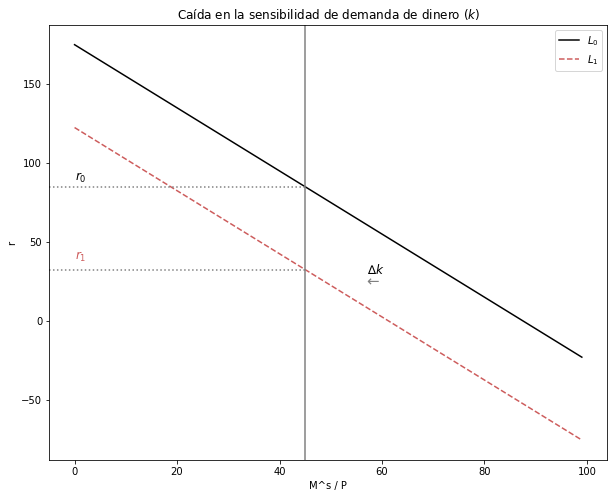

In [17]:
    # Gráfico

fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set(title="Caída en la sensibilidad de demanda de dinero $(k)$", xlabel=r'M^s / P', ylabel=r'r')
ax1.plot(Ms_MD, label= '$L_0$', color = 'black')
ax1.plot(Ms_MD_k, label= '$L_1$', color = '#CD5C5C', linestyle = 'dashed')

ax1.axvline(x = 45,  ymin= 0, ymax= 1, color = "grey")
ax1.axhline(y=85, xmin= 0, xmax= 0.46, linestyle = ":", color = "grey")
ax1.axhline(y=32, xmin= 0, xmax= 0.46, linestyle = ":", color = "grey")
ax1.text(0, 89, "$r_0$", fontsize = 12, color = 'black')
ax1.text(0, 39, "$r_1$", fontsize = 12, color = '#CD5C5C')

ax1.text(57, 30, '∆$k$', fontsize=12, color='black')
ax1.text(57, 22, '←', fontsize=15, color='grey')

ax1.legend()

plt.show()

#### Explique y grafique qué sucede en el mercado de dinero si $ΔMs < 0$

Ante la disminución de la oferta de dinero $(M^s)$, la curva de oferta se contraerá. Para volver al equilibrio, la tasa de interés $(t)$ deberá aumentar.

In [18]:
# Parameters

r_size = 100

k = 0.5
j = 0.2                
P  = 10 
Y = 35

r = np.arange(r_size)

    # Ecuación

def Ms_MD(k, j, P, r, Y):
    Ms_MD = P*(k*Y - j*r)
    return Ms_MD

Ms_MD = Ms_MD(k, j, P, r, Y)

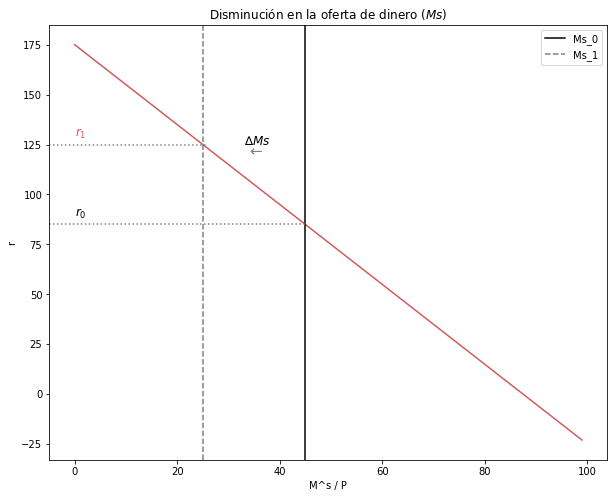

In [19]:
    # Gráfico

fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set(title="Disminución en la oferta de dinero $(Ms)$", xlabel=r'M^s / P', ylabel=r'r')
ax1.plot(Ms_MD, color = '#CD5C5C')

ax1.axvline(x = 45,  ymin= 0, ymax= 1, color = "black", label = 'Ms_0')
ax1.axvline(x = 25,  ymin= 0, ymax= 1, color = "grey", linestyle = 'dashed', label = 'Ms_1')

ax1.axhline(y=85, xmin= 0, xmax= 0.46, linestyle = ":", color = "grey")
ax1.axhline(y=125, xmin= 0, xmax= 0.28, linestyle = ":", color = "grey")

ax1.text(0, 89, "$r_0$", fontsize = 12, color = 'black')
ax1.text(0, 129, "$r_1$", fontsize = 12, color = '#CD5C5C')

ax1.text(33, 125, '∆$Ms$', fontsize=12, color='black')
ax1.text(34, 119, '←', fontsize=15, color='grey')

ax1.legend()

plt.show()

### Efectos en la Curva LM

#### ¿Cuál es el efecto de una disminución en la Masa Monetaria  $ΔMs < 0$? 

- Intuición:

$$ Ms↓ → Ms < Md → r↑ $$

- Gráficamente:

In [20]:
#--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 900             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva LM

# Definir SOLO el parámetro cambiado
Ms = 200

# Generar la ecuación con el nuevo parámetro
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

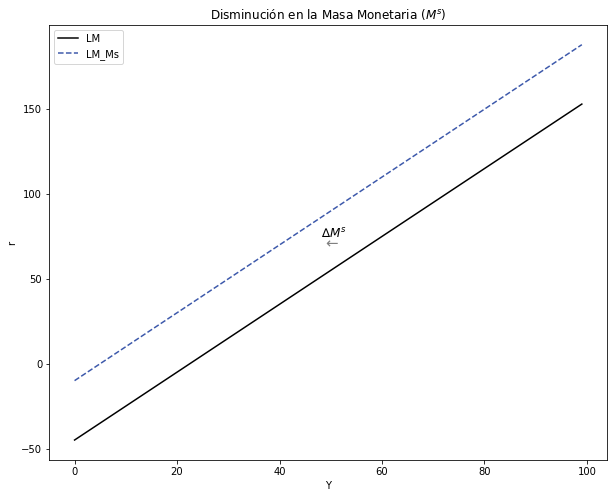

In [21]:
# Dimensiones del gráfico
y_max = np.max(i)
v = [0, Y_size, 0, y_max]   
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, i, label="LM", color = 'black')
ax.plot(Y, i_Ms, label="LM_Ms", color = '#3D59AB', linestyle = 'dashed')

# Texto agregado
plt.text(48, 74, '∆$M^s$', fontsize=12, color='black')
plt.text(49, 68, '←', fontsize=15, color='grey')

# Título y leyenda
ax.set(title = "Disminución en la Masa Monetaria $(M^s)$", xlabel=r'Y', ylabel=r'r')
ax.legend()

plt.show()

#### ¿Cuál es el efecto de un aumento en k $Δk > 0$?

- Intuición:

$$ k↑ → Md↑ → Md > Ms → r↑ $$

- Gráficamente:

In [22]:
#--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva LM

# Definir SOLO el parámetro cambiado
k = 3

# Generar la ecuación con el nuevo parámetro
def i_LM_k( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_k = i_LM_k( k, j, Ms, P, Y)

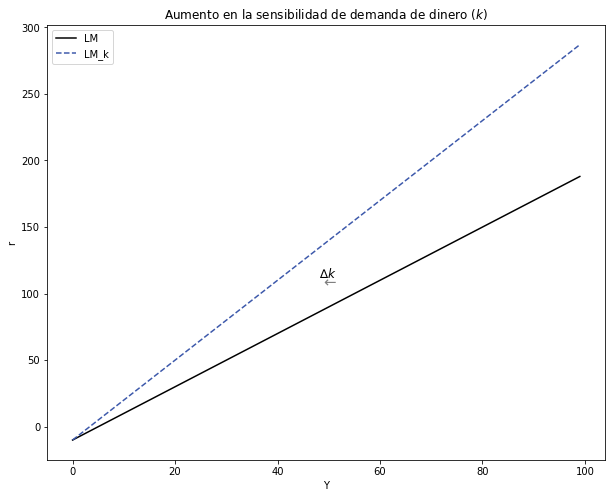

In [23]:
# Dimensiones del gráfico
y_max = np.max(i)
v = [0, Y_size, 0, y_max]   
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, i, label="LM", color = 'black')
ax.plot(Y, i_k, label="LM_k", color = '#3D59AB', linestyle = 'dashed')

# Texto agregado
plt.text(48, 112, '∆$k$', fontsize=12, color='black')
plt.text(49, 105, '←', fontsize=15, color='grey')

# Título y leyenda
ax.set(title = "Aumento en la sensibilidad de demanda de dinero $(k)$", xlabel=r'Y', ylabel=r'r')
ax.legend()

plt.show()

In [ ]:
### ¿Qué sucede en el Mercado de Dinero si el producto se incrementa? 

# Parameters con cambio en el nivel del producto
r_size = 100

k = 0.5
j = 0.2                
P  = 10 
Y_1 = 50
MS_0 = 500

r = np.arange(r_size)

# Necesitamos crear la funcion de demanda 

def MD(k, j, P, r, Y):
    MD_eq = (k*Y - j*r)
    return MD_eq
MD_1 = MD(k, j, P, r, Y_1)
# Necesitamos crear la oferta de dinero.
MS = MS_0 / P
MS

# Equilibrio en el mercado de dinero

# Creamos el seteo para la figura 
fig, ax1 = plt.subplots(figsize=(10, 8))

# Agregamos titulo t el nombre de las coordenadas
ax1.set(title="Money Market Equilibrium", xlabel=r'M^s / P', ylabel=r'r')

# Ploteamos la demanda de dinero
ax1.plot(MD_0, label= '$L_0$', color = '#CD5C5C')
#ax1.plot(MD_1, label= '$L_0$', color = '#CD5C5C')


# Para plotear la oferta de dinero solo necesitamos crear una linea vertical
ax1.axvline(x = MS,  ymin= 0, ymax= 1, color = "grey")

# Creamos las lineas puntadas para el equilibrio
ax1.axhline(y=7.5, xmin= 0, xmax= 0.5, linestyle = ":", color = "black")

# Agregamos texto
ax1.text(0, 7.5, "$r_0$", fontsize = 12, color = 'black')
ax1.text(50, 0, "$(Ms/P)_0$", fontsize = 12, color = 'black')
ax1.text(50, 7.5, "$E_0$", fontsize = 12, color = 'black')

# Nuevas curvas a partir del cambio en el nivel del producto
ax1.plot(MD_1, label= '$L_1$', color = '#4287f5')
ax1.axvline(x = MS,  ymin= 0, ymax= 1, color = "grey")
ax1.axhline(y=15, xmin= 0, xmax= 0.5, linestyle = ":", color = "black")
ax1.text(0, 15, "$r_1$", fontsize = 12, color = 'black')
ax1.text(50, 15, "$E_1$", fontsize = 12, color = 'black')


ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.legend()

plt.show()

### ¿Qué sucede en el Mercado de Dinero si la cantidad de dinero se incrementa? 

# Parameters con cambio en el nivel del producto
r_size = 100

k = 0.5
j = 0.2                
P_1  = 20 
Y = 35
MS_0 = 500

r = np.arange(r_size)

# Necesitamos crear la funcion de demanda 

def MD(k, j, P, r, Y):
    MD_eq = (k*Y - j*r)
    return MD_eq
MD_1 = MD(k, j, P_1, r, Y)
# Necesitamos crear la oferta de dinero.
MS_1 = MS_0 / P_1
MS

# Equilibrio en el mercado de dinero

# Creamos el seteo para la figura 
fig, ax1 = plt.subplots(figsize=(10, 8))

# Agregamos titulo t el nombre de las coordenadas
ax1.set(title="Money Market Equilibrium", xlabel=r'M^s / P', ylabel=r'r')

# Ploteamos la demanda de dinero
ax1.plot(MD_0, label= '$L_0$', color = '#CD5C5C')
#ax1.plot(MD_1, label= '$L_0$', color = '#CD5C5C')


# Para plotear la oferta de dinero solo necesitamos crear una linea vertical
ax1.axvline(x = MS,  ymin= 0, ymax= 1, color = "grey")

# Creamos las lineas puntadas para el equilibrio
ax1.axhline(y=7.5, xmin= 0, xmax= 0.5, linestyle = ":", color = "black")

# Agregamos texto
ax1.text(0, 7.5, "$r_0$", fontsize = 12, color = 'black')
ax1.text(50, 0, "$(Ms/P)_0$", fontsize = 12, color = 'black')
ax1.text(50, 7.5, "$E_0$", fontsize = 12, color = 'black')


# Nuevas curvas a partir del cambio en el nivel del producto
#ax1.plot(MD_1, label= '$L_1$', color = '#4287f5')
ax1.axvline(x = MS_1,  ymin= 0, ymax= 1, color = "grey")
ax1.axhline(y=12.5, xmin= 0, xmax= 0.27, linestyle = ":", color = "black")
ax1.text(0, 12.5, "$r_1$", fontsize = 12, color = 'black')
ax1.text(25, 0, "$(Ms/P)_1$", fontsize = 12, color = 'black')
ax1.text(25, 12.5, "$E_1$", fontsize = 12, color = 'black')

ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.legend()

plt.show()

## Derivación de la Curva LM a partir del Equilibrio en el Mercado de Dinero

#1----------------------Equilibrio mercado monetario

    # Parameters
r_size = 100

k = 0.5
j = 0.2                
P  = 10 
Y = 35

r = np.arange(r_size)


    # Ecuación
def Ms_MD(k, j, P, r, Y):
    Ms_MD = P*(k*Y - j*r)
    return Ms_MD

Ms_MD = Ms_MD(k, j, P, r, Y)


    # Nuevos valores de Y
Y1 = 45

def Ms_MD_Y1(k, j, P, r, Y1):
    Ms_MD = P*(k*Y1 - j*r)
    return Ms_MD

Ms_Y1 = Ms_MD_Y1(k, j, P, r, Y1)


Y2 = 25

def Ms_MD_Y2(k, j, P, r, Y2):
    Ms_MD = P*(k*Y2 - j*r)
    return Ms_MD

Ms_Y2 = Ms_MD_Y2(k, j, P, r, Y2)

#2----------------------Curva LM

    # Parameters
Y_size = 100

k = 0.5
j = 0.2                
P  = 10               
Ms = 30            

Y = np.arange(Y_size)


# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

# Gráfico de la derivación de la curva LM a partir del equilibrio en el mercado monetario

    # Dos gráficos en un solo cuadro
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 8)) 


#---------------------------------
    # Gráfico 1: Equilibrio en el mercado de dinero
    
ax1.set(title="Money Market Equilibrium", xlabel=r'M^s / P', ylabel=r'r')
ax1.plot(Y, Ms_MD, label= '$L_0$', color = '#CD5C5C')
ax1.plot(Y, Ms_Y1, label= '$L_1$', color = '#CD5C5C')
ax1.plot(Y, Ms_Y2, label= '$L_2$', color = '#CD5C5C')
ax1.axvline(x = 45,  ymin= 0, ymax= 1, color = "grey")

ax1.axhline(y=35, xmin= 0, xmax= 1, linestyle = ":", color = "black")
ax1.axhline(y=135, xmin= 0, xmax= 1, linestyle = ":", color = "black")
ax1.axhline(y=85, xmin= 0, xmax= 1, linestyle = ":", color = "black")

ax1.text(47, 139, "C", fontsize = 12, color = 'black')
ax1.text(47, 89, "B", fontsize = 12, color = 'black')
ax1.text(47, 39, "A", fontsize = 12, color = 'black')

ax1.text(0, 139, "$r_2$", fontsize = 12, color = 'black')
ax1.text(0, 89, "$r_1$", fontsize = 12, color = 'black')
ax1.text(0, 39, "$r_0$", fontsize = 12, color = 'black')

ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.legend()
 

#---------------------------------
    # Gráfico 2: Curva LM
    
ax2.set(title="LM SCHEDULE", xlabel=r'Y', ylabel=r'r')
ax2.plot(Y, i, label="LM", color = '#3D59AB')

ax2.axhline(y=160, xmin= 0, xmax= 0.69, linestyle = ":", color = "black")
ax2.axhline(y=118, xmin= 0, xmax= 0.53, linestyle = ":", color = "black")
ax2.axhline(y=76, xmin= 0, xmax= 0.38, linestyle = ":", color = "black")

ax2.text(67, 164, "C", fontsize = 12, color = 'black')
ax2.text(51, 122, "B", fontsize = 12, color = 'black')
ax2.text(35, 80, "A", fontsize = 12, color = 'black')

ax2.text(0, 164, "$r_2$", fontsize = 12, color = 'black')
ax2.text(0, 122, "$r_1$", fontsize = 12, color = 'black')
ax2.text(0, 80, "$r_0$", fontsize = 12, color = 'black')

ax2.text(72.5, -14, "$Y_2$", fontsize = 12, color = 'black')
ax2.text(56, -14, "$Y_1$", fontsize = 12, color = 'black')
ax2.text(39, -14, "$Y_0$", fontsize = 12, color = 'black')

ax2.axvline(x=70,  ymin= 0, ymax= 0.69, linestyle = ":", color = "black")
ax2.axvline(x=53,  ymin= 0, ymax= 0.53, linestyle = ":", color = "black")
ax2.axvline(x=36,  ymin= 0, ymax= 0.38, linestyle = ":", color = "black")

ax2.yaxis.set_major_locator(plt.NullLocator())   
ax2.xaxis.set_major_locator(plt.NullLocator())

ax2.legend()

plt.show()

## Curva LM

Siguiendo la última ecuación de equilibrio, la curva LM se da en función de la tasa de interés:

$$ r = -\frac{1}{j}\frac{M_o^s}{P_o} + \frac{k}{j}Y $$

# Parameters
Y_size = 100

k = 10
j = 10                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)


# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

    # Gráfico de la curva LM

# Dimensiones del gráfico
y_max = np.max(i)
v = [0, Y_size, 0, y_max]   
fig, ax = plt.subplots(figsize=(10, 8))

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Curvas a graficar
ax.plot(Y, i, label="LM", color = '#3D59AB')

# Título y leyenda
ax.set(title="LM SCHEDULE", xlabel=r'Y', ylabel=r'r')
ax.legend()


plt.show()

## Estática comparativa

### Política monetaria expansiva: incremento en la Masa Monetaria $(M^s)$

#--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva LM

# Definir SOLO el parámetro cambiado
Ms = 700

# Generar la ecuación con el nuevo parámetro
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

# Dimensiones del gráfico
y_max = np.max(i)
v = [0, Y_size, 0, y_max]   
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, i, label="LM", color = 'black')
ax.plot(Y, i_Ms, label="LM_Ms", color = '#3D59AB', linestyle = 'dashed')

# Texto agregado
plt.text(47, 76, '∆$M^s$', fontsize=12, color='black')
plt.text(49, 70, '→', fontsize=15, color='grey')

# Título y leyenda
ax.set(title = "Incremento en la Masa Monetaria $(M^s)$", xlabel=r'Y', ylabel=r'r')
ax.legend()


plt.show()


## Ejercicios

### Efectos dentro del Mercado de Dinero

#### Explique y grafique qué sucede en el mercado de dinero si $ΔY < 0$

Ante la disminución del nivel de ingresos $(ΔY < 0)$, la demanda de dinero caerá $(M^d)$. Esto se reflejará en una contracción de la curva de demanda. Dado que la demanda será menor a la oferta, para volver al equilibrio, la tasa de interés $(t)$ disminuirá.

# Parameters

r_size = 100

k = 0.5
j = 0.2                
P  = 10 
Y = 35

r = np.arange(r_size)

    # Ecuación

def Ms_MD(k, j, P, r, Y):
    Ms_MD = P*(k*Y - j*r)
    return Ms_MD

Ms_MD = Ms_MD(k, j, P, r, Y)

#----
Y = 20

def Ms_MD_Y(k, j, P, r, Y):
    Ms_MD = P*(k*Y - j*r)
    return Ms_MD

Ms_MD_Y = Ms_MD_Y(k, j, P, r, Y)

    # Gráfico

fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set(title="Caída en el nivel de ingresos $(Y)$", xlabel=r'M^s / P', ylabel=r'r')
ax1.plot(Ms_MD, label= '$L_0$', color = 'black')
ax1.plot(Ms_MD_Y, label= '$L_1$', color = '#CD5C5C', linestyle = 'dashed')

ax1.axvline(x = 45,  ymin= 0, ymax= 1, color = "grey")
ax1.axhline(y=85, xmin= 0, xmax= 0.46, linestyle = ":", color = "grey")
ax1.axhline(y=10, xmin= 0, xmax= 0.46, linestyle = ":", color = "grey")
ax1.text(0, 89, "$r_0$", fontsize = 12, color = 'black')
ax1.text(0, 15, "$r_1$", fontsize = 12, color = '#CD5C5C')

ax1.text(57, 25, '∆$Y$', fontsize=12, color='black')
plt.text(57, 18, '←', fontsize=15, color='grey')

ax1.legend()

plt.show()

#### Explique y grafique qué sucede en el mercado de dinero si $Δk < 0$

Ante la disminución de la sensibilidad de demanda de dinero $(Δk < 0)$, la demanda de dinero caerá $(M^d)$. Esto se reflejará en una contracción de la curva de demanda. Dado que la demanda será menor a la oferta, para volver al equilibrio, la tasa de interés $(t)$ disminuirá.

# Parameters

r_size = 100

k = 0.5
j = 0.2                
P  = 10 
Y = 35

r = np.arange(r_size)

    # Ecuación

def Ms_MD(k, j, P, r, Y):
    Ms_MD = P*(k*Y - j*r)
    return Ms_MD

Ms_MD = Ms_MD(k, j, P, r, Y)

#----
k = 0.35

def Ms_MD_k(k, j, P, r, Y):
    Ms_MD = P*(k*Y - j*r)
    return Ms_MD

Ms_MD_k = Ms_MD_k(k, j, P, r, Y)

    # Gráfico

fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set(title="Caída en la sensibilidad de demanda de dinero $(k)$", xlabel=r'M^s / P', ylabel=r'r')
ax1.plot(Ms_MD, label= '$L_0$', color = 'black')
ax1.plot(Ms_MD_k, label= '$L_1$', color = '#CD5C5C', linestyle = 'dashed')

ax1.axvline(x = 45,  ymin= 0, ymax= 1, color = "grey")
ax1.axhline(y=85, xmin= 0, xmax= 0.46, linestyle = ":", color = "grey")
ax1.axhline(y=32, xmin= 0, xmax= 0.46, linestyle = ":", color = "grey")
ax1.text(0, 89, "$r_0$", fontsize = 12, color = 'black')
ax1.text(0, 39, "$r_1$", fontsize = 12, color = '#CD5C5C')

ax1.text(57, 30, '∆$k$', fontsize=12, color='black')
ax1.text(57, 22, '←', fontsize=15, color='grey')

ax1.legend()

plt.show()

#### Explique y grafique qué sucede en el mercado de dinero si $ΔMs < 0$

Ante la disminución de la oferta de dinero $(M^s)$, la curva de oferta se contraerá. Para volver al equilibrio, la tasa de interés $(t)$ deberá aumentar.

# Parameters

r_size = 100

k = 0.5
j = 0.2                
P  = 10 
Y = 35

r = np.arange(r_size)

    # Ecuación

def Ms_MD(k, j, P, r, Y):
    Ms_MD = P*(k*Y - j*r)
    return Ms_MD

Ms_MD = Ms_MD(k, j, P, r, Y)

    # Gráfico

fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set(title="Disminución en la oferta de dinero $(Ms)$", xlabel=r'M^s / P', ylabel=r'r')
ax1.plot(Ms_MD, color = '#CD5C5C')

ax1.axvline(x = 45,  ymin= 0, ymax= 1, color = "black", label = 'Ms_0')
ax1.axvline(x = 25,  ymin= 0, ymax= 1, color = "grey", linestyle = 'dashed', label = 'Ms_1')

ax1.axhline(y=85, xmin= 0, xmax= 0.46, linestyle = ":", color = "grey")
ax1.axhline(y=125, xmin= 0, xmax= 0.28, linestyle = ":", color = "grey")

ax1.text(0, 89, "$r_0$", fontsize = 12, color = 'black')
ax1.text(0, 129, "$r_1$", fontsize = 12, color = '#CD5C5C')

ax1.text(33, 125, '∆$Ms$', fontsize=12, color='black')
ax1.text(34, 119, '←', fontsize=15, color='grey')

ax1.legend()

plt.show()

### Efectos en la Curva LM

#### ¿Cuál es el efecto de una disminución en la Masa Monetaria  $ΔMs < 0$? 

- Intuición:

$$ Ms↓ → Ms < Md → r↑ $$

- Gráficamente:

#--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 900             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva LM

# Definir SOLO el parámetro cambiado
Ms = 200

# Generar la ecuación con el nuevo parámetro
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

# Dimensiones del gráfico
y_max = np.max(i)
v = [0, Y_size, 0, y_max]   
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, i, label="LM", color = 'black')
ax.plot(Y, i_Ms, label="LM_Ms", color = '#3D59AB', linestyle = 'dashed')

# Texto agregado
plt.text(48, 74, '∆$M^s$', fontsize=12, color='black')
plt.text(49, 68, '←', fontsize=15, color='grey')

# Título y leyenda
ax.set(title = "Disminución en la Masa Monetaria $(M^s)$", xlabel=r'Y', ylabel=r'r')
ax.legend()

plt.show()

#### ¿Cuál es el efecto de un aumento en k $Δk > 0$?

- Intuición:

$$ k↑ → Md↑ → Md > Ms → r↑ $$

- Gráficamente:

#--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva LM

# Definir SOLO el parámetro cambiado
k = 3

# Generar la ecuación con el nuevo parámetro
def i_LM_k( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_k = i_LM_k( k, j, Ms, P, Y)

# Dimensiones del gráfico
y_max = np.max(i)
v = [0, Y_size, 0, y_max]   
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, i, label="LM", color = 'black')
ax.plot(Y, i_k, label="LM_k", color = '#3D59AB', linestyle = 'dashed')

# Texto agregado
plt.text(48, 112, '∆$k$', fontsize=12, color='black')
plt.text(49, 105, '←', fontsize=15, color='grey')

# Título y leyenda
ax.set(title = "Aumento en la sensibilidad de demanda de dinero $(k)$", xlabel=r'Y', ylabel=r'r')
ax.legend()

plt.show()

In [22]:
#--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva LM

# Definir SOLO el parámetro cambiado
k = 3

# Generar la ecuación con el nuevo parámetro
def i_LM_k( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_k = i_LM_k( k, j, Ms, P, Y)

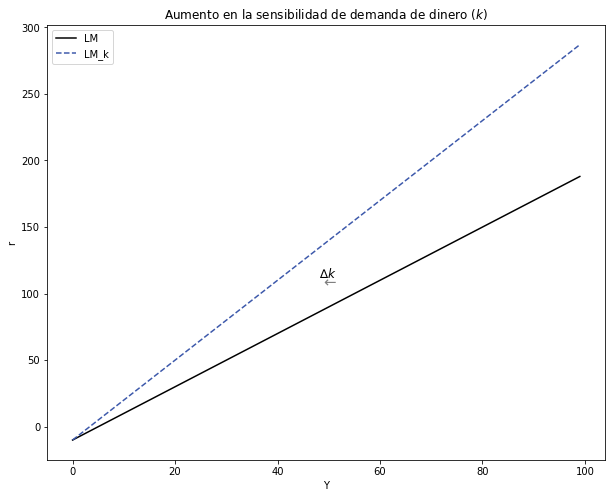

In [23]:
# Dimensiones del gráfico
y_max = np.max(i)
v = [0, Y_size, 0, y_max]   
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, i, label="LM", color = 'black')
ax.plot(Y, i_k, label="LM_k", color = '#3D59AB', linestyle = 'dashed')

# Texto agregado
plt.text(48, 112, '∆$k$', fontsize=12, color='black')
plt.text(49, 105, '←', fontsize=15, color='grey')

# Título y leyenda
ax.set(title = "Aumento en la sensibilidad de demanda de dinero $(k)$", xlabel=r'Y', ylabel=r'r')
ax.legend()

plt.show()